### Computational Physics: Project 8
- The task is to integrate the function $f(x, y) = 2x^2 + 3xy + y^2$ in the region $x^2+y^2 \leq 0.5 =: R^2$.
- The analytic solution was found using polar coordinates to be $\dfrac{3 \pi R^4}{4} \approx 0.5890486$.
- Midpoint approximation method for 2-dim is expected to converge as $\frac{1}{n}$, while the standard deviation of measurements for Monte carlo method is expected to converge as $\frac{\sigma }{\sqrt n}$. Although such trends could be observed, it was varying significantly for Monte Carlo method.
- However, both methods converge to the analytic solution.

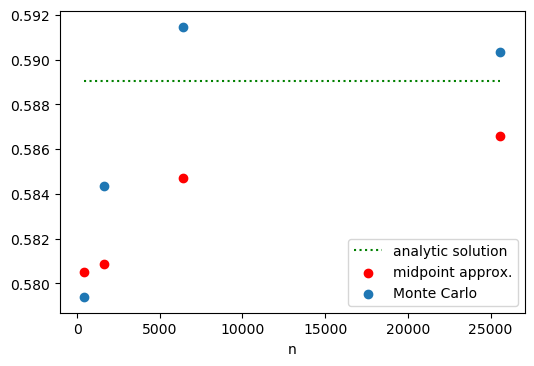

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import random

# given function
def f(x, y):
    return 2*x**2 + 3*x*y + y**2

# parameters
a0 = 1
R = np.sqrt(0.5)

# midpoint approximation
def mid_approx(h, a=a0):
    nx = ny = int(2*a / h)
    f_sum = 0
    
    for i in range(nx):
        x = -a + (i + 1/2) * h
        for j in range(ny):
            y = -a + (j + 1/2) * h
            
            if (x**2 + y**2 <= 0.5):
                f_sum += f(x, y)

    return f_sum * h**2
    
# Monte Carlo method
def monte_carlo(h, a=a0):
    nx = ny = int(2*a / h)
    f_sum = 0
    random.seed()
    
    for i in range(nx * ny):
        x = random.uniform(-a, a)
        y = random.uniform(-a, a)
        
        if (x**2 + y**2 <= 0.5):
            f_sum += f(x, y)
            
    return f_sum * h**2

h_arr = [0.1, 0.05, 0.025, 0.0125]   # grid spacing
n_h = len(h_arr)
m = 20                               # m measurements for Monte Carlo

F0 = 3 * np.pi / 4 * R**4            # analytic solution
F_mid = np.zeros((n_h, 2))           # midpoint method (value, error)
F_temp = np.zeros((n_h, m))        
F_MC = np.zeros((n_h, 3))            # Monte Carlo method (value, error, standard deviation)

for i in range(n_h):
    h = h_arr[i]
    F_mid[i][0] = mid_approx(h)      # value
    F_mid[i][1] = F0 - F_mid[i][0]   # error
    
    for j in range(m):
        xx = F_temp[i][j] = monte_carlo(h)
        
    F_MC[i][0] = np.mean(F_temp[i])  # mean value
    F_MC[i][1] = F0 - F_MC[i][0]     # error
    F_MC[i][2] = np.std(F_temp[i])   # standard deviation 

# plot
n_arr = [(int(2*a0 / h))**2 for h in h_arr]  # no. of grid points or trails
plt.figure(dpi=100)
plt.hlines(F0, n_arr[0], n_arr[n_h-1], ls='dotted', color='g', label='analytic solution')

plt.scatter(n_arr, F_mid[:, 0], label='midpoint approx.', color='r')
plt.scatter(n_arr, F_MC[:, 0], label='Monte Carlo')

# Monte Carlo with standard deviation
# plt.errorbar(n_arr, F_MC[:, 0], yerr=F_MC[:, 2], label='Monte Carlo', ls='', marker='s')

plt.legend(loc='lower right')
plt.xlabel('n')
plt.show()

In [70]:
3/4 * np.pi * 0.5**2

0.5890486225480862